In [1]:
## Machine Learning with R by Brett Lantz
## Chapter 7: Black Box Methods - Neural Networks and Support Vector Machines

In [2]:
#Example: Modeling the strength of concrete with ANNs

In [8]:
#Step 1: Collecting data
#Step 2: Exploring and preparing data
concrete <- read.csv("concrete.csv")
head(concrete)
str(concrete)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1,540,0,0,162,2.5,1040,676,28,79.99
2,540,0,0,162,2.5,1055,676,28,61.89
3,332.5,142.5,0,228,0,932,594,270,40.27
4,332.5,142.5,0,228,0,932,594,365,41.05
5,198.6,132.4,0,192,0,978.4,825.5,360,44.3
6,266,114,0,228,0,932,670,90,47.03


'data.frame':	1030 obs. of  9 variables:
 $ cement      : num  540 540 332 332 199 ...
 $ slag        : num  0 0 142 142 132 ...
 $ ash         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ water       : num  162 162 228 228 192 228 228 228 228 228 ...
 $ superplastic: num  2.5 2.5 0 0 0 0 0 0 0 0 ...
 $ coarseagg   : num  1040 1055 932 932 978 ...
 $ fineagg     : num  676 676 594 594 826 ...
 $ age         : int  28 28 270 365 360 90 365 28 28 28 ...
 $ strength    : num  80 61.9 40.3 41 44.3 ...


In [9]:
#Build normalisation function
normalize <- function(x) {
    return ( (x - min(x)) / (max(x) - min(x)) )
}

In [15]:
#Normalize dataset
concrete_norm <- as.data.frame(lapply(concrete, normalize))
head(concrete_norm)
summary(concrete_norm) #all min and max values should be 0 or 1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1,1,0,0,0.3210863,0.07763975,0.6947674,0.20572,0.07417582,0.9674847
2,1,0,0,0.3210863,0.07763975,0.7383721,0.20572,0.07417582,0.7419958
3,0.5262557,0.3964942,0,0.8482428,0,0.380814,0,0.739011,0.4726548
4,0.5262557,0.3964942,0,0.8482428,0,0.380814,0,1,0.482372
5,0.2205479,0.3683918,0,0.5607029,0,0.5156977,0.5807827,0.9862637,0.5228603
6,0.3744292,0.3171953,0,0.8482428,0,0.380814,0.1906673,0.2445055,0.5568706


     cement            slag              ash             water       
 Min.   :0.0000   Min.   :0.00000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.2063   1st Qu.:0.00000   1st Qu.:0.0000   1st Qu.:0.3442  
 Median :0.3902   Median :0.06121   Median :0.0000   Median :0.5048  
 Mean   :0.4091   Mean   :0.20561   Mean   :0.2708   Mean   :0.4774  
 3rd Qu.:0.5662   3rd Qu.:0.39775   3rd Qu.:0.5912   3rd Qu.:0.5607  
 Max.   :1.0000   Max.   :1.00000   Max.   :1.0000   Max.   :1.0000  
  superplastic      coarseagg         fineagg            age         
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.00000  
 1st Qu.:0.0000   1st Qu.:0.3808   1st Qu.:0.3436   1st Qu.:0.01648  
 Median :0.1988   Median :0.4855   Median :0.4654   Median :0.07418  
 Mean   :0.1927   Mean   :0.4998   Mean   :0.4505   Mean   :0.12270  
 3rd Qu.:0.3168   3rd Qu.:0.6640   3rd Qu.:0.5770   3rd Qu.:0.15110  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.00000  
    strength     
 M

In [16]:
#Build partition for training set(75%) and test set (25%)
concrete_train <- concrete_norm[1:773,]
concrete_test <- concrete_norm[774:1030,]

In [19]:
#Step 3: Training a model on the data
install.packages("neuralnet", repos = "https://cran.r-project.org")
library(neuralnet)

package 'neuralnet' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\Rtmp8Mgpdt\downloaded_packages


Warning message:
: package 'neuralnet' was built under R version 3.2.5Loading required package: grid
Loading required package: MASS


In [36]:
concrete_model <- neuralnet(formula = strength ~ cement + slag +
                              ash + water + superplastic + 
                              coarseagg + fineagg + age,
                              data = concrete_train)

In [37]:
concrete_model
summary(concrete_model)

Call: neuralnet(formula = strength ~ cement + slag + ash + water +     superplastic + coarseagg + fineagg + age, data = concrete_train)

1 repetition was calculated.

        Error Reached Threshold Steps
1 5.668616333    0.006307242326  1017


                    Length Class      Mode    
call                   3   -none-     call    
response             773   -none-     numeric 
covariate           6184   -none-     numeric 
model.list             2   -none-     list    
err.fct                1   -none-     function
act.fct                1   -none-     function
linear.output          1   -none-     logical 
data                   9   data.frame list    
net.result             1   -none-     list    
weights                1   -none-     list    
startweights           1   -none-     list    
generalized.weights    1   -none-     list    
result.matrix         14   -none-     numeric 

In [40]:
png("concrete.png")
print(plot(concrete_model))
dev.off()

dev.new(): using pdf(file="Rplots26.pdf")


NULL


pdf 
  2

In [41]:
plot.nn <-
function (x, rep = NULL, x.entry = NULL, x.out = NULL, radius = 0.15, 
    arrow.length = 0.2, intercept = TRUE, intercept.factor = 0.4, 
    information = TRUE, information.pos = 0.1, col.entry.synapse = "black", 
    col.entry = "black", col.hidden = "black", col.hidden.synapse = "black", 
    col.out = "black", col.out.synapse = "black", col.intercept = "blue", 
    fontsize = 12, dimension = 6, show.weights = TRUE, file = NULL, 
    ...) 
{
    net <- x
    if (is.null(net$weights)) 
        stop("weights were not calculated")
    if (!is.null(file) && !is.character(file)) 
        stop("'file' must be a string")
    if (is.null(rep)) {
        for (i in 1:length(net$weights)) {
            if (!is.null(file)) 
                file.rep <- paste(file, ".", i, sep = "")
            else file.rep <- NULL
            #dev.new()
            plot.nn(net, rep = i, x.entry, x.out, radius, arrow.length, 
                intercept, intercept.factor, information, information.pos, 
                col.entry.synapse, col.entry, col.hidden, col.hidden.synapse, 
                col.out, col.out.synapse, col.intercept, fontsize, 
                dimension, show.weights, file.rep, ...)
        }
    }
    else {
        if (is.character(file) && file.exists(file)) 
            stop(sprintf("%s already exists", sQuote(file)))
        result.matrix <- t(net$result.matrix)
        if (rep == "best") 
            rep <- as.integer(which.min(result.matrix[, "error"]))
        if (rep > length(net$weights)) 
            stop("'rep' does not exist")
        weights <- net$weights[[rep]]
        if (is.null(x.entry)) 
            x.entry <- 0.5 - (arrow.length/2) * length(weights)
        if (is.null(x.out)) 
            x.out <- 0.5 + (arrow.length/2) * length(weights)
        width <- max(x.out - x.entry + 0.2, 0.8) * 8
        radius <- radius/dimension
        entry.label <- net$model.list$variables
        out.label <- net$model.list$response
        neuron.count <- array(0, length(weights) + 1)
        neuron.count[1] <- nrow(weights[[1]]) - 1
        neuron.count[2] <- ncol(weights[[1]])
        x.position <- array(0, length(weights) + 1)
        x.position[1] <- x.entry
        x.position[length(weights) + 1] <- x.out
        if (length(weights) > 1) 
            for (i in 2:length(weights)) {
                neuron.count[i + 1] <- ncol(weights[[i]])
                x.position[i] <- x.entry + (i - 1) * (x.out - 
                  x.entry)/length(weights)
            }
        y.step <- 1/(neuron.count + 1)
        y.position <- array(0, length(weights) + 1)
        y.intercept <- 1 - 2 * radius
        information.pos <- min(min(y.step) - 0.1, 0.2)
        if (length(entry.label) != neuron.count[1]) {
            if (length(entry.label) < neuron.count[1]) {
                tmp <- NULL
                for (i in 1:(neuron.count[1] - length(entry.label))) {
                  tmp <- c(tmp, "no name")
                }
                entry.label <- c(entry.label, tmp)
            }
        }
        if (length(out.label) != neuron.count[length(neuron.count)]) {
            if (length(out.label) < neuron.count[length(neuron.count)]) {
                tmp <- NULL
                for (i in 1:(neuron.count[length(neuron.count)] - 
                  length(out.label))) {
                  tmp <- c(tmp, "no name")
                }
                out.label <- c(out.label, tmp)
            }
        }
        grid.newpage()
        pushViewport(viewport(name = "plot.area", width = unit(dimension, 
            "inches"), height = unit(dimension, "inches")))
        for (k in 1:length(weights)) {
            for (i in 1:neuron.count[k]) {
                y.position[k] <- y.position[k] + y.step[k]
                y.tmp <- 0
                for (j in 1:neuron.count[k + 1]) {
                  y.tmp <- y.tmp + y.step[k + 1]
                  result <- calculate.delta(c(x.position[k], 
                    x.position[k + 1]), c(y.position[k], y.tmp), 
                    radius)
                  x <- c(x.position[k], x.position[k + 1] - result[1])
                  y <- c(y.position[k], y.tmp + result[2])
                  grid.lines(x = x, y = y, arrow = arrow(length = unit(0.15, 
                    "cm"), type = "closed"), gp = gpar(fill = col.hidden.synapse, 
                    col = col.hidden.synapse, ...))
                  if (show.weights) 
                    draw.text(label = weights[[k]][neuron.count[k] - 
                      i + 2, neuron.count[k + 1] - j + 1], x = c(x.position[k], 
                      x.position[k + 1]), y = c(y.position[k], 
                      y.tmp), xy.null = 1.25 * result, color = col.hidden.synapse, 
                      fontsize = fontsize - 2, ...)
                }
                if (k == 1) {
                  grid.lines(x = c((x.position[1] - arrow.length), 
                    x.position[1] - radius), y = y.position[k], 
                    arrow = arrow(length = unit(0.15, "cm"), 
                      type = "closed"), gp = gpar(fill = col.entry.synapse, 
                      col = col.entry.synapse, ...))
                  draw.text(label = entry.label[(neuron.count[1] + 
                    1) - i], x = c((x.position - arrow.length), 
                    x.position[1] - radius), y = c(y.position[k], 
                    y.position[k]), xy.null = c(0, 0), color = col.entry.synapse, 
                    fontsize = fontsize, ...)
                  grid.circle(x = x.position[k], y = y.position[k], 
                    r = radius, gp = gpar(fill = "white", col = col.entry, 
                      ...))
                }
                else {
                  grid.circle(x = x.position[k], y = y.position[k], 
                    r = radius, gp = gpar(fill = "white", col = col.hidden, 
                      ...))
                }
            }
        }
        out <- length(neuron.count)
        for (i in 1:neuron.count[out]) {
            y.position[out] <- y.position[out] + y.step[out]
            grid.lines(x = c(x.position[out] + radius, x.position[out] + 
                arrow.length), y = y.position[out], arrow = arrow(length = unit(0.15, 
                "cm"), type = "closed"), gp = gpar(fill = col.out.synapse, 
                col = col.out.synapse, ...))
            draw.text(label = out.label[(neuron.count[out] + 
                1) - i], x = c((x.position[out] + radius), x.position[out] + 
                arrow.length), y = c(y.position[out], y.position[out]), 
                xy.null = c(0, 0), color = col.out.synapse, fontsize = fontsize, 
                ...)
            grid.circle(x = x.position[out], y = y.position[out], 
                r = radius, gp = gpar(fill = "white", col = col.out, 
                  ...))
        }
        if (intercept) {
            for (k in 1:length(weights)) {
                y.tmp <- 0
                x.intercept <- (x.position[k + 1] - x.position[k]) * 
                  intercept.factor + x.position[k]
                for (i in 1:neuron.count[k + 1]) {
                  y.tmp <- y.tmp + y.step[k + 1]
                  result <- calculate.delta(c(x.intercept, x.position[k + 
                    1]), c(y.intercept, y.tmp), radius)
                  x <- c(x.intercept, x.position[k + 1] - result[1])
                  y <- c(y.intercept, y.tmp + result[2])
                  grid.lines(x = x, y = y, arrow = arrow(length = unit(0.15, 
                    "cm"), type = "closed"), gp = gpar(fill = col.intercept, 
                    col = col.intercept, ...))
                  xy.null <- cbind(x.position[k + 1] - x.intercept - 
                    2 * result[1], -(y.tmp - y.intercept + 2 * 
                    result[2]))
                  if (show.weights) 
                    draw.text(label = weights[[k]][1, neuron.count[k + 
                      1] - i + 1], x = c(x.intercept, x.position[k + 
                      1]), y = c(y.intercept, y.tmp), xy.null = xy.null, 
                      color = col.intercept, alignment = c("right", 
                        "bottom"), fontsize = fontsize - 2, ...)
                }
                grid.circle(x = x.intercept, y = y.intercept, 
                  r = radius, gp = gpar(fill = "white", col = col.intercept, 
                    ...))
                grid.text(1, x = x.intercept, y = y.intercept, 
                  gp = gpar(col = col.intercept, ...))
            }
        }
        if (information) 
            grid.text(paste("Error: ", round(result.matrix[rep, 
                "error"], 6), "   Steps: ", result.matrix[rep, 
                "steps"], sep = ""), x = 0.5, y = information.pos, 
                just = "bottom", gp = gpar(fontsize = fontsize + 
                  2, ...))
        popViewport()
        if (!is.null(file)) {
            weight.plot <- recordPlot()
            save(weight.plot, file = file)
        }
    }
}
calculate.delta <-
function (x, y, r) 
{
    delta.x <- x[2] - x[1]
    delta.y <- y[2] - y[1]
    x.null <- r/sqrt(delta.x^2 + delta.y^2) * delta.x
    if (y[1] < y[2]) 
        y.null <- -sqrt(r^2 - x.null^2)
    else if (y[1] > y[2]) 
        y.null <- sqrt(r^2 - x.null^2)
    else y.null <- 0
    c(x.null, y.null)
}
draw.text <-
function (label, x, y, xy.null = c(0, 0), color, alignment = c("left", 
    "bottom"), ...) 
{
    x.label <- x[1] + xy.null[1]
    y.label <- y[1] - xy.null[2]
    x.delta <- x[2] - x[1]
    y.delta <- y[2] - y[1]
    angle = atan(y.delta/x.delta) * (180/pi)
    if (angle < 0) 
        angle <- angle + 0
    else if (angle > 0) 
        angle <- angle - 0
    if (is.numeric(label)) 
        label <- round(label, 5)
    pushViewport(viewport(x = x.label, y = y.label, width = 0, 
        height = , angle = angle, name = "vp1", just = alignment))
    grid.text(label, x = 0, y = unit(0.75, "mm"), just = alignment, 
        gp = gpar(col = color, ...))
    popViewport()
}

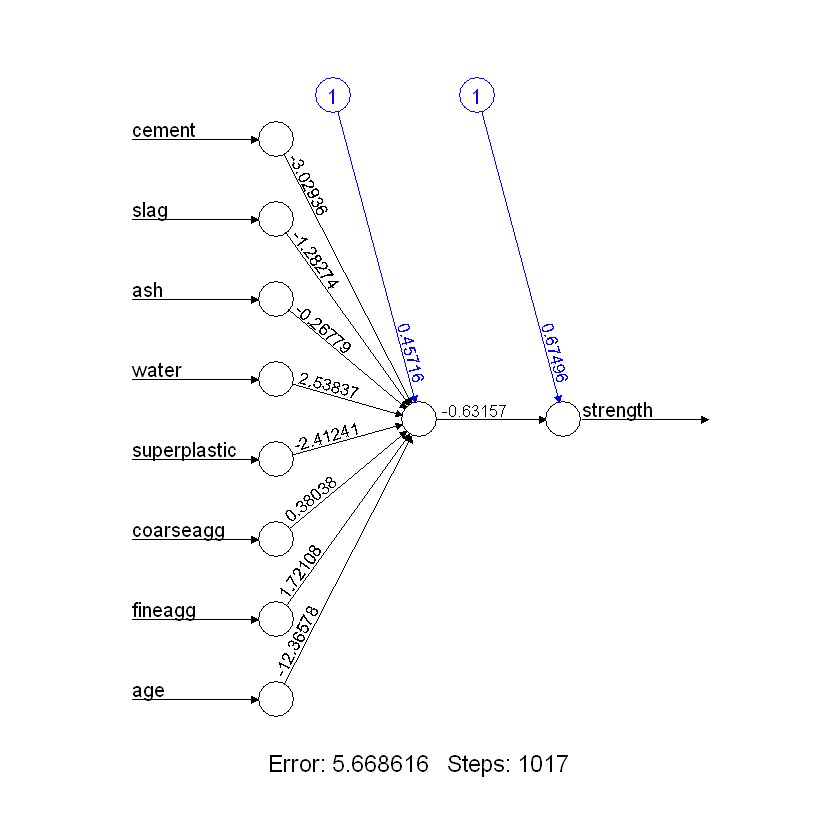

In [42]:
plot.nn(concrete_model)

In [44]:
#Step 4: Evaluating model performance
model_results <- compute(concrete_model, concrete_test[1:8])
model_results

,1,cement,slag,ash,water,superplastic,coarseagg,fineagg,age
774,1,0.639269406392694,0,0,0.512779552715655,0,0.715116279069767,0.363773206221776,0.0741758241758242
775,1,0.639269406392694,0,0,0.512779552715655,0,0.901162790697674,0.476668339187155,0.0164835164835165
776,1,0.408675799086758,0,0,0.512779552715655,0,0.880813953488372,0.451580531861515,0.0741758241758242
777,1,0.541095890410959,0,0,0.504792332268371,0,0.779069767441861,0.401404917210236,0.0164835164835165
778,1,0.541095890410959,0,0,0.504792332268371,0,0.779069767441861,0.401404917210236,0.0741758241758242
779,1,0.440639269406393,0,0,0.504792332268371,0,0.779069767441861,0.439036628198695,0.0164835164835165
780,1,0.440639269406393,0,0,0.504792332268371,0,0.779069767441861,0.439036628198695,0.0741758241758242
781,1,0.310502283105023,0,0,0.504792332268371,0,0.921511627906977,0.489212242849975,0.0741758241758242
782,1,0.442922374429224,0,0,0.560702875399361,0,0.825581395348837,0.429001505268439,0.0164835164835165
783,1,0.442922374429224,0,0,0.560702875399361,0,0.825581395348837,0.429001505268439,0.0741758241758242


In [48]:
predicted_strength <- model_results$net.result
head(predicted_strength)

774,0.3901664752
775,0.2416924094
776,0.2507481497
777,0.2281970822
778,0.3325067164
779,0.1838435107


In [49]:
#The values arent's discrete we can't make a confusion matrix instead we'll compute correlation of predicted and true values
cor(predicted_strength, concrete_test$strength)

0.7182377017


In [50]:
#Step 5: Improving model performance
concrete_model2 <- neuralnet(strength ~ cement + slag + ash + water + superplastic + coarseagg + fineagg + age,
                            data = concrete_train, hidden = 5)

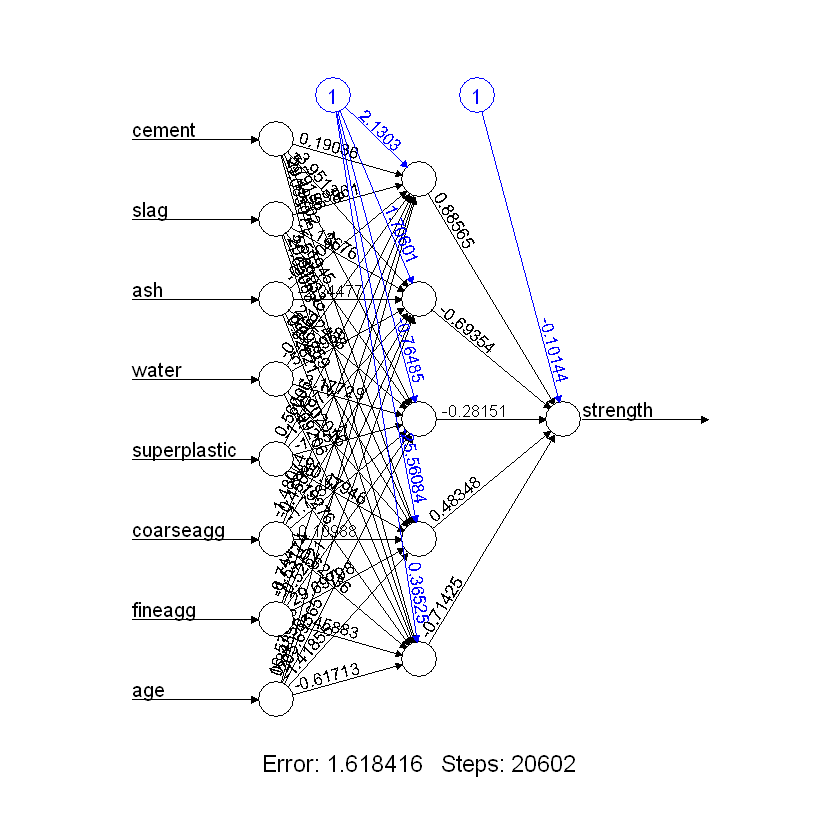

In [51]:
plot.nn(concrete_model2)

In [52]:
model_results2 <- compute(concrete_model2, concrete_test[1:8])
predicted_strength2 <- model_results2$net.result
cor(predicted_strength2, concrete_test$strength)

0.7793380325


In [4]:
#--------------------------------------------------------------------------------------------------------------------
#Support Vector Machines

In [5]:
#Example: Performing OCR with SVMs

In [6]:
#Step 1: Collecting data
#Step 2: Preparing and exploring data
letters <- read.csv("letterdata.csv")
head(letters)
str(letters)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
1,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
2,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
3,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
4,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
5,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
6,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7


'data.frame':	20000 obs. of  17 variables:
 $ letter: Factor w/ 26 levels "A","B","C","D",..: 20 9 4 14 7 19 2 1 10 13 ...
 $ xbox  : int  2 5 4 7 2 4 4 1 2 11 ...
 $ ybox  : int  8 12 11 11 1 11 2 1 2 15 ...
 $ width : int  3 3 6 6 3 5 5 3 4 13 ...
 $ height: int  5 7 8 6 1 8 4 2 4 9 ...
 $ onpix : int  1 2 6 3 1 3 4 1 2 7 ...
 $ xbar  : int  8 10 10 5 8 8 8 8 10 13 ...
 $ ybar  : int  13 5 6 9 6 8 7 2 6 2 ...
 $ x2bar : int  0 5 2 4 6 6 6 2 2 6 ...
 $ y2bar : int  6 4 6 6 6 9 6 2 6 2 ...
 $ xybar : int  6 13 10 4 6 5 7 8 12 12 ...
 $ x2ybar: int  10 3 3 4 5 6 6 2 4 1 ...
 $ xy2bar: int  8 9 7 10 9 6 6 8 8 9 ...
 $ xedge : int  0 2 3 6 1 0 2 1 1 8 ...
 $ xedgey: int  8 8 7 10 7 8 8 6 6 1 ...
 $ yedge : int  0 4 3 2 5 9 7 2 1 1 ...
 $ yedgex: int  8 10 9 8 10 7 10 7 7 8 ...


In [7]:
#in SVM all features must be numeric, we won't scale cause svm package will do it for us

In [9]:
#Split into training set and test set
letters_train <- letters[1:16000,]
letters_test <- letters[16001:20000,]

In [11]:
#Step 3: Training a model on the data
install.packages("kernlab", repos = "https://cran.r-project.org/")
library(kernlab)

package 'kernlab' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Administrator\AppData\Local\Temp\RtmpiUHcDO\downloaded_packages


Warning message:
: package 'kernlab' was built under R version 3.2.4

In [12]:
letter_classifier <- ksvm(letter ~ ., data = letters_train, kernel = "vanilladot")

 Setting default kernel parameters  


In [13]:
letter_classifier

Support Vector Machine object of class "ksvm" 

SV type: C-svc  (classification) 
 parameter : cost C = 1 

Linear (vanilla) kernel function. 

Number of Support Vectors : 7037 

Objective Function Value : -14.1746 -20.0072 -23.5628 -6.2009 -7.5524 -32.7694 -49.9786 -18.1824 -62.1111 -32.7284 -16.2209 -32.2837 -28.9777 -51.2195 -13.276 -35.6217 -30.8612 -16.5256 -14.6811 -32.7475 -30.3219 -7.7956 -11.8138 -32.3463 -13.1262 -9.2692 -153.1654 -52.9678 -76.7744 -119.2067 -165.4437 -54.6237 -41.9809 -67.2688 -25.1959 -27.6371 -26.4102 -35.5583 -41.2597 -122.164 -187.9178 -222.0856 -21.4765 -10.3752 -56.3684 -12.2277 -49.4899 -9.3372 -19.2092 -11.1776 -100.2186 -29.1397 -238.0516 -77.1985 -8.3339 -4.5308 -139.8534 -80.8854 -20.3642 -13.0245 -82.5151 -14.5032 -26.7509 -18.5713 -23.9511 -27.3034 -53.2731 -11.4773 -5.12 -13.9504 -4.4982 -3.5755 -8.4914 -40.9716 -49.8182 -190.0269 -43.8594 -44.8667 -45.2596 -13.5561 -17.7664 -87.4105 -107.1056 -37.0245 -30.7133 -112.3218 -32.9619 -27.2971 -35.5

In [15]:
#Step 4: Evaluating model performance
letter_predictions <- predict(letter_classifier, letters_test)
head(letter_predictions)

[1] U N V X N H
Levels: A B C D E F G H I J K L M N O P Q R S T U V W X Y Z

In [17]:
table(letter_predictions, letters_test$letter)

                  
letter_predictions   A   B   C   D   E   F   G   H   I   J   K   L   M   N   O
                 A 144   0   0   0   0   0   0   0   0   1   0   0   1   2   2
                 B   0 121   0   5   2   0   1   2   0   0   1   0   1   0   0
                 C   0   0 120   0   4   0  10   2   2   0   1   3   0   0   2
                 D   2   2   0 156   0   1   3  10   4   3   4   3   0   5   5
                 E   0   0   5   0 127   3   1   1   0   0   3   4   0   0   0
                 F   0   0   0   0   0 138   2   2   6   0   0   0   0   0   0
                 G   1   1   2   1   9   2 123   2   0   0   1   2   1   0   1
                 H   0   0   0   1   0   1   0 102   0   2   3   2   3   4  20
                 I   0   1   0   0   0   1   0   0 141   8   0   0   0   0   0
                 J   0   1   0   0   0   1   0   2   5 128   0   0   0   0   1
                 K   1   1   9   0   0   0   2   5   0   0 118   0   0   2   0
                 L   0   0   0   

In [20]:
agreement <- letter_predictions == letters_test$letter
head(agreement)
table(agreement)

[1]  TRUE  TRUE  TRUE FALSE  TRUE  TRUE

agreement
FALSE  TRUE 
  643  3357 

In [21]:
prop.table(table(agreement))

agreement
  FALSE    TRUE 
0.16075 0.83925 

In [ ]:
#Step 5: Improving model performance
letter_classifier_rbf <- ksvm(letter ~ ., data = letters_train, kernel = "rbfdot")
letter_predictions_rbf <- predict(letter_classifier_rbf, letters_test)

In [ ]:
agreement_rbf <- letter_predictions_rbf == letters_test$letter
table(agreement_rbf)

In [ ]:
prop.table(table(agreement_rbf)) * 100